<a href="https://colab.research.google.com/github/Mohd3/Circular-Linked-List/blob/main/Lab_8__9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Consider the following scenario
You received the iris dataset, and you need to cluster the data into K clusters, but the issue is that you don't know what is the best number of clusters.

**High-level steps**


1.   Load the iris dataset
2.   Consider only the following features (SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm)
3.   Find the best K value (Using the simple KMeans from sklearn & the Elbow method)
4.   Build the Kmeans Functions
5.   Cluster the data ( set the number of iterations to 1000)
6.   Merge the original data with the final clustering result





# Load the Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MyData = pd.read_csv('/content/drive/MyDrive/01 Data Mining/Lab 09/Iris.csv')
MyData

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Extract the following columns

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm

In [ ]:
MyData=MyData[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
MyData

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Find the best K value (Using the from sklearn simple KMeans)

In [ ]:
WCSS = []

In [ ]:
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(MyData)
    WCSS.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

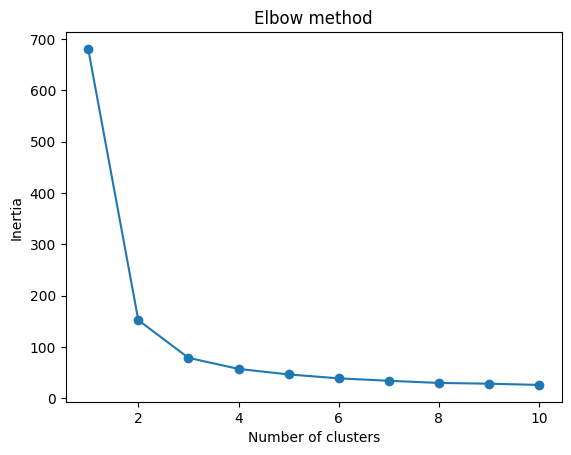

In [ ]:
plt.plot(range(1,11), WCSS, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## What is the best K value based on the Elbow method?

The best K is K=3

# Define the Kmeans Functions

In [ ]:
def initialize_centroids(data,K):
    centeriods=[]
    # shuffle the dataset
    shuffled_indx=np.random.permutation(data.shape[0])
    #Choose the k first instances
    centroid_indx=shuffled_indx[:K]
    centroids= data.loc[centroid_indx]
    return centroids

def assign_points_centroids(data, centroids):
    Dist= distance.cdist(data, centroids, 'euclidean')
    ClustersIndx=np.argmin(Dist, axis=1) #return the column index of the min value within the row
    return ClustersIndx

def compute_mean(data, points, K):
    #Intialize empty array to store our new centroids
    centroids=np.zeros((K,data.shape[1]))

    #iterate over each cluster and assign it to the mean of its points
    for i in range(K):
        # extract all points of cluster i
        centroid_mean=data[points==i].mean(axis=0)
        centroids[i] = centroid_mean
    return centroids

def KMean(data, K,iterations=10):
    #Step 1:initialize centriods
    centroids = initialize_centroids(data,K)


    for i in range(iterations):
        #Step2:assign each point to cluster based on the distance btw features and centroids
        points=assign_points_centroids(data,centroids)

        #Step3 re-center the centroid position based on the points within the cluster
        centroids = compute_mean(data, points, K)

    return centroids,points

# Using the best K and the KMean function you built, Cluster the iris dataset.

Note that the number of iterations is 1000.

In [ ]:
K = 3
iterations=1000
centroids, points = KMean(MyData, K, iterations)

# Merge the original data and the final clustering result

In [ ]:
MyData['Clusters'] = points.tolist()
MyData

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
